In [126]:
print("테스트")

테스트


# Kaggle API

In [184]:
!pip install kaggle

In [185]:
!pip show kaggle

Name: kaggle
Version: 1.4.7.1
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: c:\programdata\anaconda3\lib\site-packages
Requires: python-dateutil, urllib3, certifi, tqdm, python-slugify, requests, six
Required-by: 


In [1]:
!kaggle config path

usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')


In [3]:
!kaggle competitions list -s bike

# bike가 들어간 경진대회 리스트 보기

ref                    deadline             category       reward  teamCount  userHasEntered  
---------------------  -------------------  ----------  ---------  ---------  --------------  
bike-sharing-demand    2015-05-29 23:59:00  Playground  Knowledge       3251            True  
santas-uncertain-bags  2017-01-30 23:59:00  Playground       Swag        694           False  


In [4]:
%ls

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A89D-D431

 d:\Python 디렉터리

2018-09-12  오후 03:36    <DIR>          .
2018-09-12  오후 03:36    <DIR>          ..
2018-09-12  오후 03:36    <DIR>          .ipynb_checkpoints
2018-08-31  오전 11:14    <DIR>          .vscode
2018-09-09  오후 02:38             4,966 4주차_수업_MAE원리 설명.txt
2018-09-09  오전 10:02           103,725 Bike_Solution_Gradient_0.3867.ipynb
2018-09-02  오전 09:58    <DIR>          data
2018-09-11  오후 02:05    <DIR>          growthhacking_price
2018-09-11  오후 02:05    <DIR>          lesson
2018-09-11  오후 08:26            24,801 Titanic복습_GBM.ipynb
2018-09-12  오후 03:36             1,892 Untitled.ipynb
2018-09-04  오전 09:09    <DIR>          Week2. Titanic
2018-09-09  오전 10:56    <DIR>          Week3. Bike
2018-09-04  오전 09:09           139,718 Week3. 복습 -Bike_1차.ipynb
2018-09-07  오후 05:19            99,476 Week3. 복습 -Bike_2차 회원, 비회원 분리.ipynb
2018-09-07  오전 11:22           137,381 Week3. 복습 -Bike_3차.ipynb
2018-09-07  오전 11:17            63,828 Week3.

In [5]:
!kaggle competitions download -c bike-sharing-demand
# 기본 폴더(D:\Python)에 다운로드하기


  0%|          | 0.00/633k [00:00<?, ?B/s]
100%|##########| 633k/633k [00:00<00:00, 1.11MB/s]

  0%|          | 0.00/140k [00:00<?, ?B/s]
100%|##########| 140k/140k [00:00<00:00, 1.49MB/s]

  0%|          | 0.00/316k [00:00<?, ?B/s]
100%|##########| 316k/316k [00:00<00:00, 1.04MB/s]


In [7]:
!kaggle competitions download -c bike-sharing-demand -p ./data/bike_kaggle
# 하위 폴더 지정 후에 다운로드하기

train.csv: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!kaggle competitions files -c bike-sharing-demand
# 다운로드 파일 확인하기

name                   size  creationDate         
--------------------  -----  -------------------  
train.csv             633KB  2014-05-28 19:02:45  
sampleSubmission.csv  140KB  2014-05-28 19:02:45  
test.csv              316KB  2014-05-28 19:02:45  


- 캐글 API

# 데이터, 패키지 로딩

In [9]:
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
train = pd.read_csv("data/bike/train.csv", parse_dates = ["datetime"])
test = pd.read_csv("data/bike/test.csv", parse_dates = ["datetime"])

print(train.shape, test.shape)
print(train.info(), test.info())

(10886, 12) (6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humid

# 데이터 전처리

## (1) NaN체크 (없음)

In [11]:
train[:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
test[:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## (2) Date 변환

In [13]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
# train["minute"] = train["datetime"].dt.minute
train["dayofweek"] = train["datetime"].dt.dayofweek

train.head()

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
# train["minute"] = train["datetime"].dt.minute
test["dayofweek"] = test["datetime"].dt.dayofweek

print(train.shape, test.shape)
test.head()

(10886, 17) (6493, 14)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


## (3) 카테고리화 --> 영향없음

In [14]:
category_feature = ["season", "holiday", "workingday", "weather", "year", "month", "dayofweek", "day"]

# print(train.info(), test.info())

for var in category_feature:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

# print(train.info(), test.info())

## (4) WindSpeed 0 처리

train.loc[train["windspeed"] == 0, "wind0"] = "wind0"
train_wind0 = train.loc[train["windspeed"] == 0]
train_windnot0 = train.loc[train["windspeed"] != 0]
print(train.shape, train_wind0.shape, train_windnot0.shape)

#windspeed 함수 만들기
#RandaomForestRegressor든 RandomForestClassifier든 같다.
#오히려 이미 windspeed 값이 있는 것들을 모아서, 그것 내에서 CV를 체크해서 모델을 만들어놓고, 0을 예측하는게 정확할 듯

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    datawind0 = data.loc[data["windspeed"] == 0]
    datawindnot0 = data.loc[data["windspeed"] != 0]
    
    wind_col = ['year', 'month', 'day', 'hour']

    datawindnot0["windspeed"] = datawindnot0["windspeed"].astype("str")  
    # 스트링으로 다시 설정하는 이유가 무엇일지?
    
    model_wind = RandomForestClassifier()
    
    model_wind.fit(datawindnot0[wind_col], datawindnot0["windspeed"])
    
    wind0values = model_wind.predict(X = datawind0[wind_col])
    # 왜 X = 라는 것을 넣는지?
    
    predict_wind0 = datawind0
    predict_windnot0 = datawindnot0
    
    predict_wind0["windspeed"] = wind0values
    
    data = predict_windnot0.append(predict_wind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True) ## 인덱스를 다시 설정하는 기능이라는데, 조금더 스터디 필요함
    data.drop("index", inplace = True, axis = 1)
    
    return data

train_wind0 = train.loc[train["windspeed"] == 0]
print(train_wind0.shape)
train_wind0.head()

train = predict_windspeed(train)

train_wind0 = train.loc[train["windspeed"] == 0]
print(train_wind0.shape)
print(train.shape)
#train.head(100)
train.to_csv("data/bike/train_wind0.csv")

test = predict_windspeed(test)

test_wind0 = test.loc[test["windspeed"] == 0]
print(test_wind0.shape)
test_wind0.head()

print(test.shape)
test.head()

## (4) WindSpeed 0 처리 - 아래값으로 넣어줌 - 효과없음

train["windspeed_next"] = train["windspeed"]

train.loc[:, ["windspeed", "windspeed_next"]].tail(10)

for i in range(20):
    train.loc[train["windspeed"] == 0, "windspeed_next"] = train["windspeed_next"].shift(-1) # 아래값을 넣어줘라.
    train.loc[10885, "windspeed_next"] = train.loc[10885, "windspeed"] # 위로 옮겨주면, 마지막 값이 NaN이 되니까, 그걸 방지하는 역할
    if len(train.loc[train["windspeed_next"] == 0].index) == 0: # 0이 될때면, 몇번째 roop인지 프린트해라.
        print(i) 
        break

train.loc[:, ["windspeed", "windspeed_next"]].head(10)
train.loc[:, ["windspeed", "windspeed_next"]].tail(10)

test["windspeed_next"] = test["windspeed"]
for i in range(20):
    test.loc[test["windspeed"] == 0, "windspeed_next"] = test["windspeed_next"].shift(-1) # 아래값을 넣어줘라.
    train.loc[6492, "windspeed_next"] = train.loc[6492, "windspeed"]
    if len(test.loc[test["windspeed_next"] == 0].index) == 0: # 0이 될때면, 몇번째 roop인지 프린트해라.
        print(i) 
        break

#test[["windspeed", "windspeed_next"]]

## (5) Windspeed, temp, humidity 구간화

In [15]:
#sns.lmplot(data = train, x = "temp", y = "count")
train["temp"].quantile(0.1)
train["temp"].quantile(0.9)

#temp가 feature importance가 가장 높으므로 먼저 테스트
train.loc[train["temp"] < 5, "temp_encode"] = 0
train.loc[(train["temp"] >= 5) & (train["temp"] < 15), "temp_encode"] = 1
train.loc[(train["temp"] >= 15) & (train["temp"] < 25), "temp_encode"] = 2
train.loc[(train["temp"] >= 25) & (train["temp"] < 35), "temp_encode"] = 3
train.loc[train["temp"] >= 35, "temp_encode"] = 4

test.loc[test["temp"] < 5, "temp_encode"] = 0
test.loc[(test["temp"] >= 5) & (test["temp"] < 15), "temp_encode"] = 1
test.loc[(test["temp"] >= 15) & (test["temp"] < 25), "temp_encode"] = 2
test.loc[(test["temp"] >= 25) & (test["temp"] < 35), "temp_encode"] = 3
test.loc[test["temp"] >= 35, "temp_encode"] = 4

In [16]:
#humidity => humidity_encode
train.loc[train["humidity"] < 38, "humidity_encode"] = 0
train.loc[(train["humidity"] >= 38) & (train["humidity"] < 48), "humidity_encode"] = 1
train.loc[(train["humidity"] >= 48) & (train["humidity"] < 58), "humidity_encode"] = 2
train.loc[(train["humidity"] >= 58) & (train["humidity"] < 68), "humidity_encode"] = 3
train.loc[(train["humidity"] >= 68) & (train["humidity"] < 78), "humidity_encode"] = 4
train.loc[(train["humidity"] >= 78) & (train["humidity"] < 88), "humidity_encode"] = 5
train.loc[train["humidity"] >= 88, "humidity_encode"] = 6

test.loc[test["humidity"] < 38, "humidity_encode"] = 0
test.loc[(test["humidity"] >= 38) & (test["humidity"] < 48), "humidity_encode"] = 1
test.loc[(test["humidity"] >= 48) & (test["humidity"] < 58), "humidity_encode"] = 2
test.loc[(test["humidity"] >= 58) & (test["humidity"] < 68), "humidity_encode"] = 3
test.loc[(test["humidity"] >= 68) & (test["humidity"] < 78), "humidity_encode"] = 4
test.loc[(test["humidity"] >= 78) & (test["humidity"] < 88), "humidity_encode"] = 5
test.loc[test["humidity"] >= 88, "humidity_encode"] = 6

# EDA

[Text(0.5,1,'casual')]

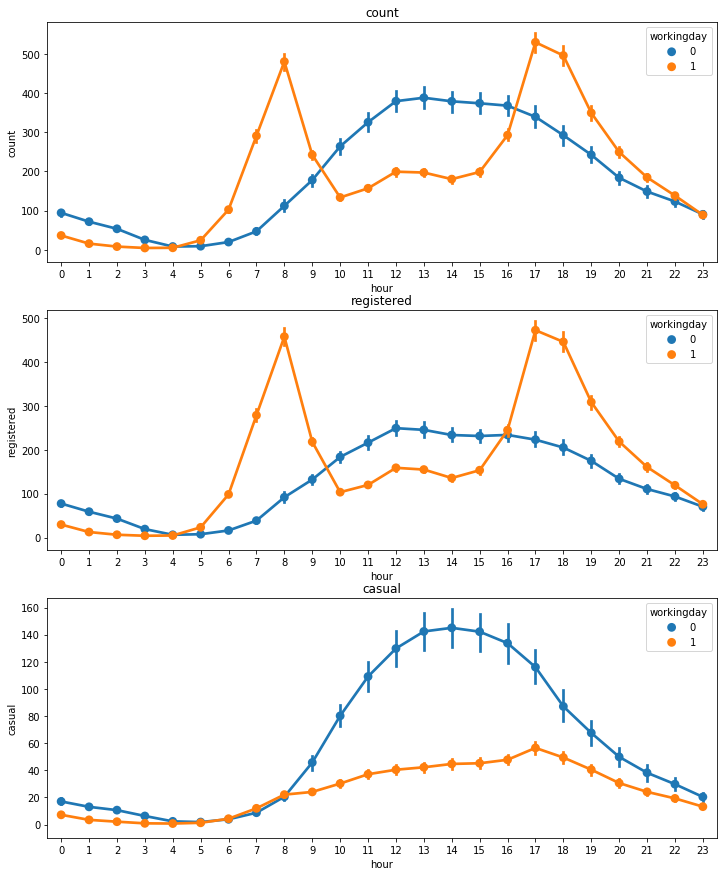

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3)
fig.set_size_inches(12, 15)

sns.pointplot(data = train, ax = ax1, x = "hour", y = "count", hue = "workingday")
ax1.set(title = "count")
sns.pointplot(data = train, ax = ax2, x = "hour", y = "registered", hue = "workingday")
ax2.set(title = "registered")
sns.pointplot(data = train, ax = ax3, x = "hour", y = "casual", hue = "workingday")
ax3.set(title = "casual")

# 모델 로딩

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              n_estimators = 100,
                             random_state = 79)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

# Hyperparameter Tuning

## (1) Grid Search 방법

In [19]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek', 'temp_encode',
       'humidity_encode'],
      dtype='object')

In [20]:
#### Summary ####

# WindSpeed를 RandomRegressor로 넣은 것 --> 오히려 낮아짐
# 회원/비회원 구분하는 것도 오히려 낮아짐
# Month 추가하는 것도 RMSLE는 높아지나, Kaggle은 오히려 낮아짐

# RF --> Gradient Boost 로 변경
# Feature Importance로 걸러냄 (Holiday)
# temp_encode 적용 (5개 구간), humidity, atemp는 encode효과 없음

feature_names = ['hour', 'humidity', 'atemp', 'dayofweek', 'windspeed', 'weather',
       'season', 'workingday', 'year', 'temp_encode'] 
        # Gradient Boost 사용 (오늘의 코드)
        # RMSLE = 0.2088 Kaggle = 0.3788  (104위 / 3251명 중 상위 3.2%)
        # (vs. 오늘의 코드 RMSLE = 0.2135 Kaggle = 0.38677)
        # RMSLE = 0.3701 Kaggle = 0.4217 (Random Forest)

feature_names21 = ['hour', 'humidity', 'atemp', 'dayofweek', 'windspeed_next', 'weather',
       'season', 'workingday', 'year', 'temp_encode'] 
        # windspeed 0 값에 아래 값을 넣어주었음.
        # Gradient 적용
        # RMSLE = 0.2080 # Kaggle = 0.3805
        # RF는 Kaggle = 0.4217

feature_names20 = ['hour', 'humidity', 'atemp', 'dayofweek', 'windspeed', 'weather',
       'season', 'workingday', 'year'] 
        # temp_encode 제외 (feature_importance에서 가장 낮은)
        # Gradient 적용
        # RMSLE = 0.2092 # Kaggle = 0.3791    
        
feature_names10 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity_encode', 'weather', 'season', 'windspeed'] 
        # humidity --> humidity_encode
        # MAE 32.37  #RMSLE = 0.3683(RF)
        # RMSLE = 0.2160 # Kaggle = 0.3792    

feature_names11 = ['hour', 'year', 'temp', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'season', 'windspeed'] 
        # temp_encode --> temp
        # MAE 32.36  #RMSLE = 0.3711(RF)
        # RMSLE = 0.2066 # Kaggle = 0.3818    
        
feature_names9 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp_encode', 'humidity', 'weather', 'season', 'windspeed'] 
        # atemp ==> atemp_encode
        # Gradient Boost 엔진 적용
        # MAE 35.38  #RMSLE = 0.3811(RF)
        # RMSLE = 0.2352 #Kaggle = 0.3857

feature_names12 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'season'] 
        # windspeed, weather 제외 (gbm의 feature importance가 낮은 bottom 2개)
        # MAE 33.53  #RMSLE = 0.3780(RF)
        # RMSLE = 0.2066 # Kaggle = 0.4087  

        
        
#### RF --> Gradient Boost ####
# RF로는 0.4216이 최고점수

feature_names13 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'season', 'windspeed', 'month'] 
        # month 추가
        # RMSLE = 0.19898 Kaggle = 0.4232  (오히려 낮아짐)
        
feature_names8 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'season', 'windspeed'] 
        # DS스쿨 버전으로 season, windspeed 추가 & month 제외 
        # MAE 32.48  # RMSLE = 0.3700  # Kaggle 0.4216
        # DS스쿨은 temp를 그냥 쓰고, n_estimator는 10이었음 ==> 0.43019

feature_names7 = ['hour', 'year', 'temp_encode', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather'] 
        # MAE 31.87 # RMSLE = 0.37517 # Kaggle = 0.4883
        # day 제외
        ### n_estimators = 10 --> 100으로 변경 (유투브 오늘의코드 참고)
        # MAE 30.44 # RMSLE = 0.36253 # Kaggle = 0.4830
        
feature_names5 = ['hour', 'year', 'temp_encode', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'day'] # --> temp 인코딩
        # MAE 33.06 # RMSLE = 0.38270 # Kaggle = 0.4993

feature_names4 = ['hour', 'year', 'temp', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'day'] 
        # MAE 32.82 # RMSLE = 0.38018 # Kaggle = 0.5027
        # --> season, holiday, windspeed 제외
        # 중요도 순으로 나열한 후 마지막 3개 제외. 
        # 카테고리화를 해도 차이 없음

feature_names6 = ['hour', 'year', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity'] 
        # MAE 33.27 # RMSLE = 0.38611 # Kaggle = 0.5032
        # weather, temp_encode, day 제외 (feature importance 하위 2개)
        # 오히려 떨어짐
                
feature_names3 = ['hour', 'year', 'temp', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'day', 'windspeed'] 
        # MAE = 31.23 # RMSLE = 0.37026 # Kaggel = 1.8
        # windspeed를 RandomForestRegressor로 넣었는데, 과적합된 듯.

        
#### Kaggle 제출하기 전 ####

feature_names2 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'dayofweek'] 
        # MAE 33.03 # RMSLE = 0.38296 --> hour 추가

feature_names1 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'dayofweek'] 
        # MAE 118.12

lable_name = 'count' # 대괄호를 씌워주면, 배열이 아니라 DataFrame이 되어버려서 뒤의 CV 등의 연산에서 오류가 생김

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[lable_name]

X_train.shape
y_train.shape

(10886,)

# Model Evaluation (Cross Val.)

In [21]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv = 20)

print(y_predict.shape)
y_predict

(10886,)


array([ 28.72 ,  23.4  ,  23.825, ..., 188.21 , 173.15 , 110.45 ])

# Evaluation Metrics - (MAE, MSE, MSLE)

In [22]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

score_mse = mean_squared_error(y_train, y_predict)
score_mae = mean_absolute_error(y_train, y_predict)
# score_mae = np.abs(y_predict - y_train).mean()
score_msle = mean_squared_log_error(y_train, y_predict)
score_rmsle = np.sqrt(score_msle) # rmsle가 없기 때문에

print(f"Score(MSE) = {score_mse: .5f}")
print(f"Score(MAE) = {score_mae: .5f}")
print(f"Score(MSLE) = {score_msle: .5f}")
print(f"Score(RMSLE) = {score_rmsle: .5f}")

Score(MSE) =  2747.45248
Score(MAE) =  32.49238
Score(MSLE) =  0.14538
Score(RMSLE) =  0.38128


# Evaluation Metrics - (RMSLE)

In [23]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    distance = log_predict - log_actual
    
    square_distance = distance **2
    
    mean_square_distance = square_distance.mean()
    
    score = np.sqrt(mean_square_distance)
    
    return score

score_rmsle = make_scorer(rmsle)
score_rmsle

make_scorer(rmsle)

In [24]:
from sklearn.model_selection import cross_val_score

score_rf = cross_val_score(model, X_train, y_train, 
                        cv = 20, scoring = score_rmsle).mean()

print(f"Score = {score_rf: .5f}")

Score =  0.37015


# Model - RF

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

# Model - GBM

- 오늘의코드 / GBM 모델 적용 Github 사례
- https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-ensemble-model.ipynb

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score_gbm = rmsle(np.exp(y_train_log), np.exp(preds))

print("RMSLE Value For Gradient Boost: ", score_gbm)

RMSLE Value For Gradient Boost:  0.2088627507221706


# Model - XGBoost

In [29]:
#import xgboost as xgb

### 모델2 - GBM - CV
- GBM을 CV하는 것은 RF와 같은 방식으로는 적용되지 않음

from sklearn.model_selection import cross_val_score

score_gbm_cv = cross_val_score(gbm, X_train, y_train, 
                        cv = 5, scoring = score_rmsle).mean()

print(f"Score = {score_gbm_cv: .5f}")

# Feature Selection - RF

In [30]:
print(list(zip(feature_names, model.feature_importances_)))
# f_imp = df(feature_names, model.feature_importances_)

feature_df = list(zip(feature_names, model.feature_importances_))
feature_df = pd.DataFrame(feature_df)

# display(pd.DataFrame(feature_df))
# feature_df.columns

[('hour', 0.608289634582182), ('humidity', 0.031737949220000235), ('atemp', 0.10583374985592683), ('dayofweek', 0.043723854612610275), ('windspeed', 0.011220941940552778), ('weather', 0.015412436925514169), ('season', 0.0398047206430278), ('workingday', 0.04687816764901052), ('year', 0.08718386687133634), ('temp_encode', 0.009914677699838637)]


In [31]:
feature_df.columns = feature_df.columns.astype(str)
# RangeIndex(start=0, stop=2, step=1)로 되어 있던 것은 문자로 변경

feature_df.columns = ["feature", "importance"]
# 컬럼명 변경, 아래처럼 하는 것은 안됨
# feature_df.rename(columns={'0':"feature", '1':"feature_importance"})

feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
# importance 먼저 정렬, 그리고 importance 정렬

feature_df

,feature,importance
0,hour,0.608290
2,atemp,0.105834
8,year,0.087184
7,workingday,0.046878
3,dayofweek,0.043724
6,season,0.039805
1,humidity,0.031738
5,weather,0.015412
4,windspeed,0.011221
9,temp_encode,0.009915


In [32]:
feature_df["feature"].values # 중요도 순으로 피처를 나열함

array(['hour', 'atemp', 'year', 'workingday', 'dayofweek', 'season',
       'humidity', 'weather', 'windspeed', 'temp_encode'], dtype=object)

# Feature Selection - GBM

In [33]:
print(list(zip(feature_names, gbm.feature_importances_)))
# f_imp = df(feature_names, model.feature_importances_)

feature_df_gbm = list(zip(feature_names, gbm.feature_importances_))
feature_df_gbm = pd.DataFrame(feature_df_gbm)

# display(pd.DataFrame(feature_df))
# feature_df.columns

[('hour', 0.251014560408349), ('humidity', 0.1643381935413141), ('atemp', 0.15675300857740485), ('dayofweek', 0.11868013875387472), ('windspeed', 0.11652981321736966), ('weather', 0.05691799886085279), ('season', 0.04844586729372895), ('workingday', 0.036233159318597226), ('year', 0.034580307267607684), ('temp_encode', 0.01650695276090171)]


In [34]:
feature_df_gbm.columns = feature_df_gbm.columns.astype(str)
# RangeIndex(start=0, stop=2, step=1)로 되어 있던 것은 문자로 변경

feature_df_gbm.columns = ["feature", "importance"]
# 컬럼명 변경, 아래처럼 하는 것은 안됨
# feature_df.rename(columns={'0':"feature", '1':"feature_importance"})

feature_df_gbm.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
# importance 먼저 정렬, 그리고 importance 정렬

feature_df_gbm

,feature,importance
0,hour,0.251015
1,humidity,0.164338
2,atemp,0.156753
3,dayofweek,0.118680
4,windspeed,0.116530
5,weather,0.056918
6,season,0.048446
7,workingday,0.036233
8,year,0.034580
9,temp_encode,0.016507


In [35]:
feature_df_gbm["feature"].values # 중요도 순으로 피처를 나열함

array(['hour', 'humidity', 'atemp', 'dayofweek', 'windspeed', 'weather',
       'season', 'workingday', 'year', 'temp_encode'], dtype=object)

# 회원 + 비회원

In [36]:
model.fit(X_train, train["casual"])
pred_casual = model.predict(X_test)
pred_casual

array([2.19, 1.05, 1.04, ..., 3.44, 3.43, 2.73])

In [37]:
model.fit(X_train, train["registered"])
pred_reg = model.predict(X_test)
pred_reg

array([10.67      ,  4.82      ,  2.35      , ..., 92.24      ,
       98.50666667, 45.23      ])

In [38]:
predictions = pred_casual + pred_reg
predictions

array([ 12.86      ,   5.87      ,   3.39      , ...,  95.68      ,
       101.93666667,  47.96      ])

# Model Prediction & Graph Check - RF

In [39]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 10.67,   4.82,   2.35,   1.65,   1.7 ,   5.23,  38.21, 101.25,
       229.21, 131.29])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'test')]

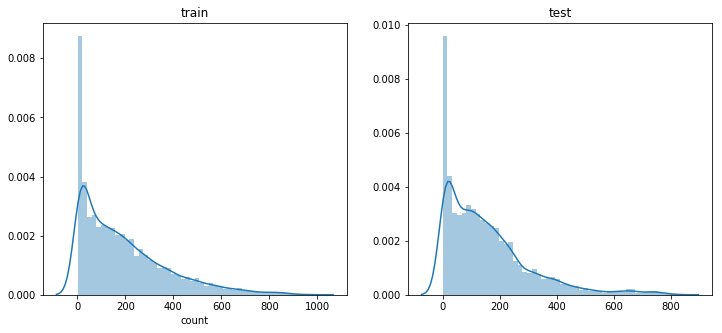

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

# Model Prediction & Graph Check - GBM

In [41]:
predsTest_ex = gbm.predict(X_test)
predsTest = np.exp(predsTest_ex)

print(predsTest.shape)
predsTest[0:10]

(6493,)


array([ 14.30392681,   5.49450502,   3.69100196,   2.84042462,
         2.3439911 ,   8.53828639,  36.21253138,  94.57711278,
       220.60685097, 114.24083315])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'test')]

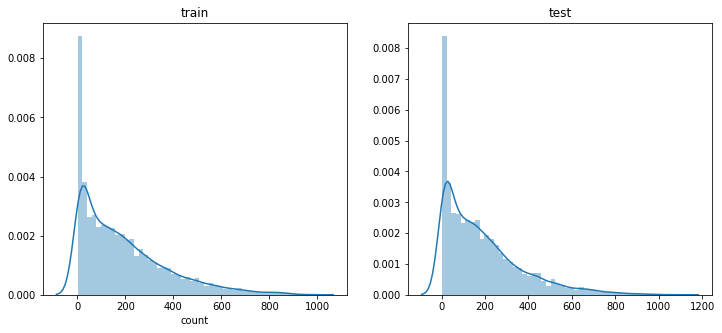

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predsTest, ax = ax2, bins = 50)
ax2.set(title = "test")

# Submission - RF

In [43]:
predictions

array([10.67      ,  4.82      ,  2.35      , ..., 92.24      ,
       98.50666667, 45.23      ])

In [44]:
submission = pd.read_csv("data/bike/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.67
1,2011-01-20 01:00:00,4.82
2,2011-01-20 02:00:00,2.35
3,2011-01-20 03:00:00,1.65
4,2011-01-20 04:00:00,1.70


In [45]:
# 날짜 넣기
import datetime
today_bike = datetime.datetime.today().strftime("%Y%m%d")

In [46]:
#RandomForest 파일 내보내기
submission.to_csv(f"data/bike/Score_RMSLE_{score_rf: .5f}_rf_submission_{today_bike}.csv", index=False)

# Submission - GBM

In [47]:
submission = pd.read_csv("data/bike/sampleSubmission.csv")
submission

submission["count"] = predsTest

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,14.303927
1,2011-01-20 01:00:00,5.494505
2,2011-01-20 02:00:00,3.691002
3,2011-01-20 03:00:00,2.840425
4,2011-01-20 04:00:00,2.343991


In [48]:
submission.to_csv(f"data/bike/Score_RMSLE_{score_gbm: .5f}_gbm_submission_{today_bike}.csv", index=False)

# 추가로 작업해볼 것들

- 자동 모델 선정 방식을 적용해보기

### "기타"
- 원핫인코딩
- Kaggle API로 제출해보기

# Kaggle API로 제출하고 점수 체크하기

In [59]:
# Kaggle에 파일 제출하기
!kaggle competitions submit -c bike-sharing-demand -f "./data/bike/Score_RMSLE_0.37015_rf_submission_20180911.csv" -m "KaggleAPI"

Successfully submitted to Bike Sharing Demand


In [55]:
# Kaggle에 제출했던 목록 확인하기
!kaggle competitions submissions -c bike-sharing-demand

fileName                                          date                 description  status    publicScore  privateScore  
------------------------------------------------  -------------------  -----------  --------  -----------  ------------  
Score_RMSLE_0.37015_rf_submission_20180912.csv    2018-09-12 06:48:09  Kaggle API   complete  0.44115      None          
Score_RMSLE_ 0.36958_rf_submission_20180909.csv   2018-09-09 03:49:49  None         complete  0.42171      None          
Score_RMSLE_ 0.20802_gbm_submission_20180909.csv  2018-09-09 03:49:31  None         complete  0.38051      None          
Score_RMSLE_ 0.37015_rf_submission.csv            2018-09-09 02:52:01  None         complete  0.42174      None          
Score_RMSLE_ 0.20928_gbm_submission.csv           2018-09-09 02:32:49  None         complete  0.37916      None          
Score_RMSLE_ 0.30094_reg_submission.csv           2018-09-07 08:15:06  None         complete  0.46520      None          
Score_RMSLE_ 0.19898_gbm